Import dependencies

In [1]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
(m, n) = (100, 30)
A = np.random.randn(m, n)
A = np.asmatrix(A)
B = np.random.randn(m, 1)
B = np.asmatrix(B)

L1.5 problem

In [11]:
X = cvx.Variable(n)
X = cvx.reshape(X, (n, 1))
S = cvx.Variable(m)
S = cvx.reshape(S, (m, 1))
constraints = [S >= cvx.abs(A*X-B)]
objective = cvx.Minimize(cvx.atoms.pnorm(S, 3/2))
cvx.Problem(objective, constraints).solve()
X_1 = X.value

/usr/local/lib/python3.9/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7 times so far.

  warnings.warn(msg, UserWarning)


Optimality condition

In [23]:
r = A*X_1-B
print(A.T*(3/2*(np.multiply(np.sign(r), np.sqrt(np.abs(r))))).)

[[ 2.17020001e-05]
 [ 1.81150764e-06]
 [-5.71875248e-05]
 [ 2.41465002e-05]
 [-2.60778537e-05]
 [-1.33809477e-05]
 [ 3.28865837e-05]
 [-2.34946804e-05]
 [ 3.98717338e-05]
 [ 2.17459981e-05]
 [ 7.89068559e-06]
 [ 1.10570560e-05]
 [-5.34035727e-05]
 [-5.87944043e-05]
 [ 1.05647281e-05]
 [ 2.85703599e-05]
 [ 3.59788917e-06]
 [-2.21353124e-05]
 [ 6.75410090e-06]
 [ 5.04662887e-06]
 [-2.63698678e-05]
 [ 3.24158033e-05]
 [-6.02100705e-05]
 [ 1.76534563e-05]
 [ 1.52692073e-05]
 [ 1.13033494e-05]
 [-2.74576922e-05]
 [ 1.17216985e-05]
 [ 5.74950161e-05]
 [ 2.57563623e-05]]


L2 problem

In [41]:
X_L2 = cvx.Variable(n)
X_L2 = cvx.reshape(X, (n, 1))
objective = cvx.Minimize(cvx.atoms.pnorm(A*X_L2-B, 2))
cvx.Problem(objective, constraints).solve()
X_l2 = X_L2.value

/usr/local/lib/python3.9/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 12 times so far.

  warnings.warn(msg, UserWarning)


L1 problem

In [42]:
X_L1 = cvx.Variable(n)
X_L1 = cvx.reshape(X, (n, 1))
objective = cvx.Minimize(cvx.atoms.pnorm(A*X_L1-B, 1))
cvx.Problem(objective, constraints).solve()
X_3 = X_L1.value

/usr/local/lib/python3.9/dist-packages/cvxpy/expressions/expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 13 times so far.

  warnings.warn(msg, UserWarning)


Residuals

In [43]:
r = A*X_1-B
rL2 = A*X_l2 -B
rL1 = A*X_3 - B


Figures

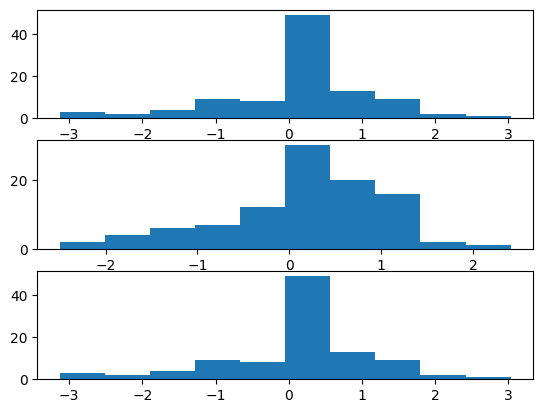

In [44]:
plt.figure(1)
plt.subplot(311)
plt.hist(r)
plt.subplot(312)
plt.hist(rL2)
plt.subplot(313)
plt.hist(rL1)
plt.show()